# **Community Analysis**

Workflow:

0) intro to community Detection and Algos used
1) Run the 4 algos on entire Healthy network, looking at what communities each method is detecting etc - general analysis
2) Run 4 algos on Diseased Network, looking at same, 
3) Run 4 algos on healthy-subnetwork - talk about communities
4) Run 4 algos on Diseased - subnetwork - talk about differences
**At each step, compare results across 4 algos

## **Introduction** - Understanding Communities

In network science, communities can generally be defined as locally dense connected subgraphs. That is to say, all nodes of a community must be accessible through other nodes of the same community. The existence of communities within a network relies upon the connectedness and density hypotheses, which assumes that (1) if a network consists of two isolated components, each community is limited to only one component. The hypothesis also implies that on the same component a community cannot consist of two subgraphs that do not have a link to each other; and (2)Nodes in a community are more likely to connect to other members of the same community than to nodes in other communities. 

The challenge of detecting communities in protein networks lies in the fact that both the number and size of communities are unknown, unlike in methods of graph partitioning, where these parameters are given. The relationship between a network size and the number of possible, unique partitions is represented as Dobinski's formula: 

$$B_N=\frac{1}{e}\sum\limits_{j = 0}^\infty  {\frac{{j^N }}{{j!}}}$$


Where $B_N$ is the Bell number count of all possible partitions in a set, indicating the number of possible partitions grows faster than exponentially with larger networks, making the problem NP-hard. 

In order to identify communities within our protein networks, we will be implementing a variety of algorithms described below.

## Overview of Implemented Community Detection Algorithms:

## **The Louvain Algorithm**

When we assume the hypothesis that a randomly wired network lacks inherent community structure, any systematic deviation from that random configuration becomes meaninfgul, and if measured, allows for comparisons to be made in the quality of network partitions. This measurment called modularity can be written as:




$$M_c=\frac{{L_c }}{L}-\left({\frac{{k_c }}{{2L}}}\right)^2$$


where L is the number of links in the graph, L<sub>c </sub> is the total number of links within the proposed community, and k<sub>c </sub> is the total degree of the nodes in this community.

This measure, when summed over all n<sub>c</sub> identified communuties, represents the partition's modularity and can be defined as:




$$M=\sum\limits_{c=1}^{n_c }{\left[{\frac{{L_c}}{L}-\left({\frac{{k_c}}{{2L}}}\right)^2}\right]}$$

This value can range from -1/2 to 1, where 0 would indicate the whole network is a single community. If each node belonged to a separate community, then L<sub>c</sub> would be 0 and the resulting M value would be negative. Since M is a fractional measure of the difference between the observed and expected number of edges, paritions with a higher M should indicate that those paritions more accurately capture the true community structure.  

Indeed, the Maximal Modularity Hypothesis, which states that "For a given network the partition with maximum modularity corresponds to the optimal community structure", is the basis for the Louvain algorithm. The Louvain algorithm is a greedy, agglomerative algorithm which uses a two-part iterative process broken into modularity optimization and community aggregation. To start, the algorithm labels each node as its own community. It then optimizes for modularity by reassigning nodes to neighboring communities only if the calculated difference in modularity is positive. This step is repeated until maximal modularity has been reached. In the community aggregation step, each community is reassigned as a super-node with a self-loop containing all its within-community edges, and the super-nodes are then treated as a new network, where the modularity optimization can be reapplied. This iterative process yields a hierarchical organization of communities.

The Louvain algorithm is fast, and scales to large networks due to its use of a heuristic in order to reduce the computational complexity associated with the NP-hard problem of optimizing modularity within a network. 

## **The FastGreedy Algorithm**

Similar to the Louvain algoritmh, the FastGreedy Algorithm uses a bottom-up agglomerative approach, based on optimizing modularity, $M$, to identify community partitions. The advantage of the FastGreedy algorithm lies in its speed, as it was modified with sparse graphs in mind. Sparse graphs are those in which there are far fewer edges observed than edges possible given a set of nodes, and is often a characteristic feature of protein networks. When communities are merged together during the heirarchical clustering process, pairs of rows and columns within the adjacency matrices are merged together, but since many of those rows and columns contain zeros in sparse graphs, much of the computational power allocated to agglomerative algorithms is wasted on the empty regions of the graph. This algorithm improves both memory utilization and speed by altering the data structures such that rather than storing the adjaceny matrix in memory and calculating the $\Delta M$ each time, it instead stores, and updates a matrix of $\Delta M$  values, eliminating the storage of any communities that aren't connected by at least one edge. The algorithm also utilizes a data structure to store the largest $\Delta M$, reducing computational time associated with computing changes in modularity, and allowing for a faster-than-average runtime of essentially O($\textit{n}$ log$^2$ $\textit{n}$) for sparse graphs, where n is the number of nodes.

## **The Edge-Betweenness Algorithm**

Unlike in Agglomerative algorithms where the starting assumption is that each node is its own community, divisive algorithms begin with the opposing assumption that the entire network is a community, and systematically removes the links connecting nodes that belong to different communities until the network is broken into its sub-partitions. To accomplish this, these algorithms use a different measure, called centrality to determine which nodes belong to each community.

The Edge-Betweenness algorithm, also called the Girvan-Newman Algorithm, systematically prunes edges that are least central, or are most "between" communities, until the resulting graph is fully partitioned. The Edge-Betweenness algorithm uses a defintion of centrality described as the number of shortest paths running through the given edge, and serves as measure of the edge's influence over the flow of information in the network. There are four main steps this algorithm carries out and are described as follows.

The first step is to calculate the betweeneness for all edges in the network. This calculation can be represented as:

$$g(\upsilon) = \sum_{s\neq\upsilon\neq t} \frac{\sigma_{\textit{st}}(\upsilon)}{\sigma_{\textit{st}}}$$

where $\sigma_{st}$ represents the total number of shortest paths from node $\textit{s}$ to node $\textit{t}$ and $\sigma_{\textit{st}}$ represents the number of those paths that have an edge passing through node $\upsilon$. After computing the edge-betweenness value for each node pair in the network, those edges with the highest values are pruned, creating network partitions. The algorithm then recalculates the betweenness centrality for all edges affected by the pruning, and repeats this process of pruning, followed by a recalculation, until no edges remain. On sparse graphs, the algorithm runs in time $O(n^{3})$ due to the computationally difficulty associated with calculating edge-betweenness for each pair of nodes in the network at each iteration, making this algorithm the slowest that we will apply.

## **The WalkTrap Algorithm**

 Lastly, we will also implement the WalkTrap Algorithm, which is another hierarchical clustering algorithm. The basic intuition applied in the WalkTrap Algorithm is that random walks from one node to another should get "trapped" into densely connected parts corresponding to communities. The algorithm defines a metric $\textit{r}$ used to measure the similarity of community structure between two nodes. This metric, $\textit{r}$, is a distance calculated from the set of all probabilities of a random walk connecting node $\textit{i}$ to node $\textit{j}$ in $\textit{t}$ steps, represented as $P_{\textit{ij}}^{\textit{t}}$.
The resulting value should be high for two nodes within the same community, and low for nodes that in different communities. 
Using these probabilities as the decisive metric, the algorithm then merges communities in a greedy fashion, based on minimizing the mean of the squared distances between each vertex and its community. This process is then repeated to form graph partitions.  

_____________________________________________________________________________________________________

# **Community Detection Analysis of the Healthy Network:**

In [ ]:
#Code to import all modules used for entire section - just for ease of deployment

## Overview:

## Here, we will apply and compare the various community detection algorithms to reveal the community structure within our healthy human macrophage protein network.

In [100]:
import networkx as nx
import matplotlib.pyplot as plt 
import community 
import time
from cdlib import algorithms
from networkx.algorithms.community import greedy_modularity_communities

#import graph
file = open("../Data/Macrophage_protein_network_with_attributes.pkl", "rb")
G = nx.read_gpickle(file)


### **Using the Louvain method:**

In [113]:

#Running, and timing the algorithm:
start = time.time()
louvain_partition = community.best_partition(G, random_state=0)  #This object returned is a dictionary containing the nodes of graph G as keys, and the community number that node belongs to as the value
end = time.time()
louvain_time = (end-start)

print("The Louvain algorithm took {} seconds to run".format(round(louvain_time,2)))


#Changing structure of dictionary so that keys = community assignment, and values = list of nodes. This will make it easier for later use
louvain_best_partition_working = {}
for key,value in louvain_partition.items():
    if value in louvain_best_partition_working.keys():
        louvain_best_partition_working[value].append(key) 
    else:
        louvain_best_partition_working[value] = []    

#Sorting dictionary so keys are in ascending order:
louvain_best_partition = {}
sorted_key_list = list(louvain_best_partition_working.keys())
sorted_key_list.sort()

for i in sorted_key_list:
    louvain_best_partition[i] = louvain_best_partition_working[i]
        
#Determining how many communities constitute the 'best partition'. i.e how many communities did louvain find?
louvain_comm_list = list(louvain_best_partition.keys())
print("The best partition of the louvain algorithm identified {} communities".format(len(louvain_comm_list)))

The Louvain algorithm took 0.23 seconds to run
The best partition of the louvain algorithm identified 47 communities


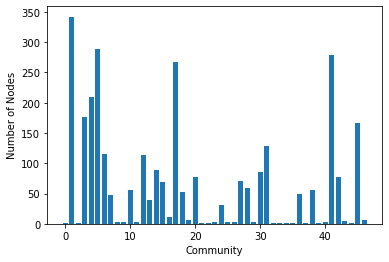

In [114]:
#How many nodes are in each community?
def Community_distrib(partition):
    """Function takes a community partition from a community detection algorithm and plots the distribution of nodes across those communities.""" 
    """Note that the input must be a dictionary with keys=community IDs, and values = list of nodes contained in that community."""
    community_list = list(partition.keys())
    community_list.sort()
    node_counts = []
    for community in community_list:
        node_counts.append(len(partition[community]))
    comm_plot = plt.bar(community_list,node_counts)
    plt.xlabel("Community")
    plt.ylabel("Number of Nodes")
    return(comm_plot)

Community_distrib(louvain_best_partition);

No handles with labels found to put in legend.
No handles with labels found to put in legend.


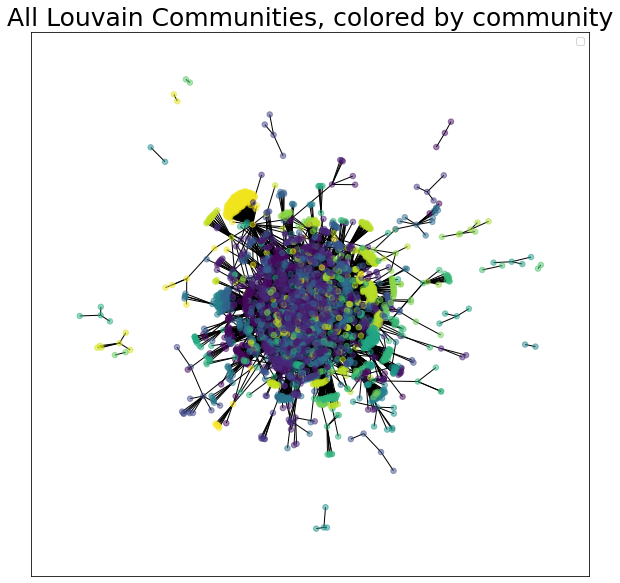

In [96]:
#Visualzing all communities on one map, coloring nodes by community

#set fig dimensions
plt.figure(figsize =(10,10))

#setting x and y coordinates for nodes and edges
pos = nx.spring_layout(G, iterations=20, seed = 15)

cmap = [value for key,value in louvain_partition.items()]

#Adding nodes
nx.draw_networkx_nodes(G, 
                           pos, 
                           node_size=30,
                           alpha = 0.5,
                           nodelist = louvain_partition.keys(), 
                           node_color = cmap)

#Adding edges
nx.draw_networkx_edges(G, pos, edgelist=G.edges())

#Plot labels
name = "All Louvain Communities, colored by community"
plt.title((name), fontdict = {'fontsize': 25, "color":'black'})
plt.legend(scatterpoints=1)

# Put a legend below current axis
plt.legend(scatterpoints =1)

plt.show()

# NEED TO ADD LEGEND WITH COLORS FOR EACH COMMUNITY

ValueError: 'c' argument must be a color, a sequence of colors, or a sequence of numbers, not ['Photoreceptor inner segment']

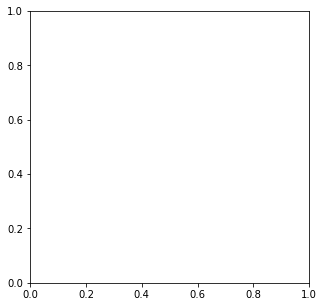

In [116]:
#Create subplots for each community, to visualize each

for community in louvain_best_partition:
    
    #set fig dimensions
    plt.figure(figsize =(5,5))

    #setting x and y coordinates for nodes and edges
    pos = nx.spring_layout(G, iterations=20, seed = 15)
    
    #set color map by subcell location
    cmap = []
    for node in louvain_best_partition[community]:
        G.nodes[node]['Subcellular_location_[CC]']
    
    #Draw out neighborhood nodes of central node
    nx.draw_networkx_nodes(G, 
                           pos, 
                           node_size=30,
                           alpha = 0.5,
                           nodelist = louvain_best_partition[community], 
                           node_color = cmap)


    #Pull edges from main Graph that correspond to nodes in the neighborhood
    edge_list = []
    for edge in G.edges():
        if (edge[0] in louvain_best_partition[community]) and (edge[1] in louvain_best_partition[community]):
            edge_list.append(edge)
        

    #Draw Edges        
    nx.draw_networkx_edges(G,pos, edgelist=edge_list)
    
    #Plot Labels
    name = "Community #: " + str(community)
    plt.title((name), fontdict = {'fontsize': 25, "color":'black'})
    plt.legend(scatterpoints=1)
    
    plt.show()
    
    
#Hardcode a dictionary with color values to reference
#within each communitt, what are the central nodes 

### **Using the FastGreedy method:**

In [77]:
#Running and timing the algorithm:
start = time.time()
FastGreedy_partition = list(greedy_modularity_communities(G)) #The object returned is a list of sets of nodes, each for a different community
end = time.time()
FastGreedy_time = (end-start)

print("The FastGreedy algorithm took {} seconds to run".format(round(FastGreedy_time,2)))

#How many communities did the FastGreedy Algorithm find?
print("The FastGreedy algorithm identified {} communities".format(len(FastGreedy_partition)))

The FastGreedy algorithm took 2.65 seconds to run
The FastGreedy algorithm identified 49 communities


<BarContainer object of 49 artists>

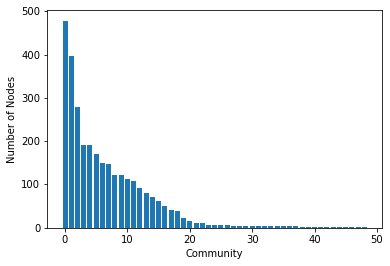

In [78]:
#How many nodes are in each community?
def FastGreedy_plotter(partition):
    """Function takes a list of sets of nodes outputted by FastGreedy""" 
    """Modularity algorithm and returns a plot of the distribution of the number of nodes in each community"""
    comm_list = []
    node_counts = []
    counter = 0
    for nodeset in FastGreedy_partition:
        comm_list.append(counter)
        node_counts.append(len(nodeset))
        counter+=1
    comm_plot = plt.bar(comm_list,node_counts)
    plt.xlabel("Community")
    plt.ylabel("Number of Nodes")
    return(comm_plot)
FastGreedy_plotter(FastGreedy_partition)

Need to explore each community, visualize it and its neighbors, etc. Need to figure out how to color by node given messiness of attributes

### **Using the WalkTrap method:**

In [80]:
#Running and timing the algorithm
start = time.time()
WalkTrap_partition = algorithms.walktrap(G) #The object returned is a NodeClusterint object
end = time.time()
WalkTrap_time = (end-start)

print("The WalkTrap algorithm took {} seconds to run".format(round(WalkTrap_time,2)))

The WalkTrap algorithm took 0.3 seconds to run


In [36]:
print(WalkTrap_partition)

Need to figure out how to work with nodeclustering objects

### **Using the Edge-Betweenness method:**

In [81]:
#Running and timing the algorithm
start = time.time()
EdgeBetweenness_partition = algorithms.girvan_newman(G,level=1,) #The object returned is a list of sets of nodes, each for a different community
end = time.time()
EdgeBetweenness_time = (end-start)/60

print("The WalkTrap algorithm took {} minutes to run".format(round(EdgeBetweenness_time,2)))

The WalkTrap algorithm took 12.12 minutes to run


In [82]:
print(EdgeBetweenness_partition)

important takeaways

## Comparing Methods

In [ ]:
#code for comparing and talking about differences

## Overall Conclusions

Comment on Patterns observed across all three, consistencies, deviations, key things to mention

_________________________________________________________________________________

# **Community Detection Analysis of the Diseased Network:**

In [ ]:
#Code to import all modules used for entire section - just for ease of deployment

## Overview:

Overall goal here for this first analysis

### **Using the Louvain method:**

In [ ]:
#code here, explore and talk about biological relevance of communities

important takeaways

### **Using the FastGreedy method:**

In [ ]:
#code here, explore and talk about biological relevance of communities

Important takeaways

### **Using the WalkTrap method:**

In [ ]:
#code here, explore and talk about biological relevance of communities

important takeaways

### **Using the Edge-Betweenness method:**

In [ ]:
#code here, explore and talk about biological relevance of communities

important takeaways

## Comparing Methods

In [ ]:
#code for comparing and talking about differences

## Overall Conclusions

Comment on Patterns observed across all three, consistencies, deviations, key things to mention

_________________________________________________________________________________

# **Community Detection Analysis of the Healthy Sub-Network:**

In [ ]:
#Code to import all modules used for entire section - just for ease of deployment

## Overview:

Overall goal here for this first analysis

### **Using the Louvain method:**

In [ ]:
#code here, explore and talk about biological relevance of communities

important takeaways

### **Using the FastGreedy method:**

In [ ]:
#code here, explore and talk about biological relevance of communities

Important takeaways

### **Using the WalkTrap method:**

In [ ]:
#code here, explore and talk about biological relevance of communities

important takeaways

### **Using the Edge-Betweenness method:**

In [ ]:
#code here, explore and talk about biological relevance of communities

important takeaways

## Comparing Methods

In [23]:
#code for comparing and talking about differences

## Overall Conclusions

Comment on Patterns observed across all three, consistencies, deviations, key things to mention

_________________________________________________________________________________

# **Community Detection Analysis of the Diseased Sub-Network:**

In [24]:
#Code to import all modules used for entire section - just for ease of deployment

## Overview:

Overall goal here for this first analysis

### **Using the Louvain method:**

In [25]:
#code here, explore and talk about biological relevance of communities

important takeaways

### **Using the FastGreedy method:**

In [26]:
#code here, explore and talk about biological relevance of communities

Important takeaways

### **Using the WalkTrap method:**

In [27]:
#code here, explore and talk about biological relevance of communities

important takeaways

### **Using the Edge-Betweenness method:**

In [28]:
#code here, explore and talk about biological relevance of communities

important takeaways

## Comparing Methods

In [29]:
#code for comparing and talking about differences

## Overall Conclusions

Comment on Patterns observed across all three, consistencies, deviations, key things to mention

_________________________________________________________________________________

# **Remarks of Community Analysis**

bla